In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noahvukosa
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████| 3.33k/3.33k [00:00<00:00, 1.05MB/s]

In [31]:
data = pd.read_csv('./heart-disease-cleveland-uci/heart_cleveland_upload.csv')

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [33]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [34]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
292    False
293    False
294    False
295    False
296    False
Length: 297, dtype: bool

In [35]:
copy = data.copy()

In [36]:
copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [37]:
copy.info()
randomizedcopy = copy.sample(frac=1)
randomizedcopy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2,1
115,53,1,2,130,246,1,2,173,0,0.0,0,3,0,0
42,55,0,1,132,342,0,0,166,0,1.2,0,0,0,0
88,64,0,2,140,313,0,0,133,0,0.2,0,0,2,0
155,77,1,3,125,304,0,2,162,1,0.0,0,3,0,1


In [38]:
dataset = randomizedcopy.values
data.shape

(297, 14)

In [39]:
X = dataset[:,0:12].astype(float) # number of cols-1
Y = dataset[:,13].astype(float)

In [40]:
train_data = X[0:205,:]
train_labels = Y[0:205]
test_data = X[206:,:]
test_labels = Y[206:]


In [43]:
print(train_data)
print(train_labels)

[[63.   0.   3.  ...  4.   1.   3. ]
 [53.   1.   2.  ...  0.   0.   3. ]
 [55.   0.   1.  ...  1.2  0.   0. ]
 ...
 [35.   0.   3.  ...  1.4  0.   0. ]
 [67.   1.   3.  ...  0.9  1.   2. ]
 [44.   1.   3.  ...  0.   0.   1. ]]
[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]


In [45]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [46]:
print(train_data)

[[ 0.93757764 -1.38873015  0.88762756 ...  2.67835643  0.65893772
   2.48739132]
 [-0.13618446  0.7200823  -0.15216472 ... -0.88525265 -0.96855906
   2.48739132]
 [ 0.07856796 -1.38873015 -1.19195701 ...  0.18383008 -0.96855906
  -0.69295309]
 ...
 [-2.06895625 -1.38873015  0.88762756 ...  0.36201053 -0.96855906
  -0.69295309]
 [ 1.36708249  0.7200823   0.88762756 ... -0.0834406   0.65893772
   1.42727652]
 [-1.10257036  0.7200823   0.88762756 ... -0.88525265 -0.96855906
   0.36716171]]


In [64]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [65]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 85
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [66]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/85


2023-03-08 13:49:38.395490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.8094 - accuracy: 0.5065

2023-03-08 13:49:39.897530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 37ms/step - loss: 0.8094 - accuracy: 0.5065 - val_loss: 0.7672 - val_accuracy: 0.4706
Epoch 2/85
31/31 [==============================] - 1s 20ms/step - loss: 0.7773 - accuracy: 0.5649 - val_loss: 0.7606 - val_accuracy: 0.4314
Epoch 3/85
31/31 [==============================] - 1s 20ms/step - loss: 0.6791 - accuracy: 0.6494 - val_loss: 0.7498 - val_accuracy: 0.4706
Epoch 4/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6785 - accuracy: 0.6429 - val_loss: 0.7504 - val_accuracy: 0.5098
Epoch 5/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6780 - accuracy: 0.6948 - val_loss: 0.7390 - val_accuracy: 0.5686
Epoch 6/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6700 - accuracy: 0.6558 - val_loss: 0.7417 - val_accuracy: 0.5882
Epoch 7/85
31/31 [==============================] - 1s 23ms/step - loss: 0.6194 - accuracy: 0.6948 - val_loss: 0.7343 - val_accuracy: 0.5882
Epoch 8/85
31/31 [======

Epoch 59/85
31/31 [==============================] - 1s 18ms/step - loss: 0.3204 - accuracy: 0.8701 - val_loss: 0.6553 - val_accuracy: 0.7255
Epoch 60/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3173 - accuracy: 0.8701 - val_loss: 0.6454 - val_accuracy: 0.7255
Epoch 61/85
31/31 [==============================] - 1s 21ms/step - loss: 0.2882 - accuracy: 0.8896 - val_loss: 0.6453 - val_accuracy: 0.7255
Epoch 62/85
31/31 [==============================] - 1s 23ms/step - loss: 0.2866 - accuracy: 0.8961 - val_loss: 0.6559 - val_accuracy: 0.7255
Epoch 63/85
31/31 [==============================] - 1s 21ms/step - loss: 0.2954 - accuracy: 0.8766 - val_loss: 0.6726 - val_accuracy: 0.7255
Epoch 64/85
31/31 [==============================] - 1s 23ms/step - loss: 0.3112 - accuracy: 0.8896 - val_loss: 0.6713 - val_accuracy: 0.7255
Epoch 65/85
31/31 [==============================] - 1s 29ms/step - loss: 0.2882 - accuracy: 0.8961 - val_loss: 0.6779 - val_accuracy: 0.7255
Epoch 

2023-03-08 13:50:33.408044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.9368 - accuracy: 0.4740

2023-03-08 13:50:34.599483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 37ms/step - loss: 0.9368 - accuracy: 0.4740 - val_loss: 0.7623 - val_accuracy: 0.5294
Epoch 2/85
31/31 [==============================] - 1s 19ms/step - loss: 0.8409 - accuracy: 0.4870 - val_loss: 0.7299 - val_accuracy: 0.5294
Epoch 3/85
31/31 [==============================] - 1s 19ms/step - loss: 0.8098 - accuracy: 0.4870 - val_loss: 0.7081 - val_accuracy: 0.5098
Epoch 4/85
31/31 [==============================] - 1s 19ms/step - loss: 0.7520 - accuracy: 0.5130 - val_loss: 0.6903 - val_accuracy: 0.5294
Epoch 5/85
31/31 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.6039 - val_loss: 0.6746 - val_accuracy: 0.6078
Epoch 6/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6920 - accuracy: 0.5779 - val_loss: 0.6597 - val_accuracy: 0.6275
Epoch 7/85
31/31 [==============================] - 1s 22ms/step - loss: 0.6814 - accuracy: 0.6623 - val_loss: 0.6517 - val_accuracy: 0.6863
Epoch 8/85
31/31 [======

Epoch 59/85
31/31 [==============================] - 1s 17ms/step - loss: 0.3220 - accuracy: 0.8506 - val_loss: 0.4079 - val_accuracy: 0.8039
Epoch 60/85
31/31 [==============================] - 1s 17ms/step - loss: 0.3322 - accuracy: 0.8831 - val_loss: 0.4074 - val_accuracy: 0.8039
Epoch 61/85
31/31 [==============================] - 1s 18ms/step - loss: 0.3264 - accuracy: 0.8701 - val_loss: 0.4091 - val_accuracy: 0.8039
Epoch 62/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3087 - accuracy: 0.8701 - val_loss: 0.4149 - val_accuracy: 0.8431
Epoch 63/85
31/31 [==============================] - 1s 20ms/step - loss: 0.2687 - accuracy: 0.9091 - val_loss: 0.4109 - val_accuracy: 0.8431
Epoch 64/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3366 - accuracy: 0.8571 - val_loss: 0.4111 - val_accuracy: 0.8235
Epoch 65/85
31/31 [==============================] - 1s 20ms/step - loss: 0.3139 - accuracy: 0.8831 - val_loss: 0.4122 - val_accuracy: 0.8235
Epoch 

2023-03-08 13:51:23.207376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.8916 - accuracy: 0.5195

2023-03-08 13:51:24.482780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 38ms/step - loss: 0.8916 - accuracy: 0.5195 - val_loss: 0.7178 - val_accuracy: 0.5490
Epoch 2/85
31/31 [==============================] - 1s 21ms/step - loss: 0.8619 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.6078
Epoch 3/85
31/31 [==============================] - 1s 20ms/step - loss: 0.7296 - accuracy: 0.5714 - val_loss: 0.6764 - val_accuracy: 0.6863
Epoch 4/85
31/31 [==============================] - 1s 20ms/step - loss: 0.7615 - accuracy: 0.5065 - val_loss: 0.6531 - val_accuracy: 0.7255
Epoch 5/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6554 - accuracy: 0.6299 - val_loss: 0.6335 - val_accuracy: 0.7451
Epoch 6/85
31/31 [==============================] - 1s 20ms/step - loss: 0.6689 - accuracy: 0.5584 - val_loss: 0.6183 - val_accuracy: 0.7451
Epoch 7/85
31/31 [==============================] - 1s 19ms/step - loss: 0.6174 - accuracy: 0.6883 - val_loss: 0.6018 - val_accuracy: 0.7647
Epoch 8/85
31/31 [======

Epoch 59/85
31/31 [==============================] - 1s 20ms/step - loss: 0.2915 - accuracy: 0.8701 - val_loss: 0.4418 - val_accuracy: 0.8431
Epoch 60/85
31/31 [==============================] - 1s 19ms/step - loss: 0.2946 - accuracy: 0.8571 - val_loss: 0.4441 - val_accuracy: 0.8431
Epoch 61/85
31/31 [==============================] - 1s 19ms/step - loss: 0.2982 - accuracy: 0.8636 - val_loss: 0.4417 - val_accuracy: 0.8431
Epoch 62/85
31/31 [==============================] - 1s 20ms/step - loss: 0.3011 - accuracy: 0.8831 - val_loss: 0.4421 - val_accuracy: 0.8627
Epoch 63/85
31/31 [==============================] - 1s 21ms/step - loss: 0.2904 - accuracy: 0.8701 - val_loss: 0.4427 - val_accuracy: 0.8431
Epoch 64/85
31/31 [==============================] - 1s 21ms/step - loss: 0.2640 - accuracy: 0.8766 - val_loss: 0.4431 - val_accuracy: 0.8627
Epoch 65/85
31/31 [==============================] - 1s 20ms/step - loss: 0.2875 - accuracy: 0.8636 - val_loss: 0.4414 - val_accuracy: 0.8627
Epoch 

2023-03-08 13:52:16.554686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 0.8922 - accuracy: 0.4481

2023-03-08 13:52:17.851464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 38ms/step - loss: 0.8922 - accuracy: 0.4481 - val_loss: 0.8012 - val_accuracy: 0.3333
Epoch 2/85
31/31 [==============================] - 1s 20ms/step - loss: 0.7670 - accuracy: 0.5390 - val_loss: 0.7680 - val_accuracy: 0.3529
Epoch 3/85
31/31 [==============================] - 1s 20ms/step - loss: 0.7303 - accuracy: 0.5390 - val_loss: 0.7408 - val_accuracy: 0.4706
Epoch 4/85
31/31 [==============================] - 1s 19ms/step - loss: 0.7449 - accuracy: 0.5455 - val_loss: 0.7155 - val_accuracy: 0.5098
Epoch 5/85
31/31 [==============================] - 1s 20ms/step - loss: 0.6876 - accuracy: 0.5974 - val_loss: 0.6875 - val_accuracy: 0.6471
Epoch 6/85
31/31 [==============================] - 1s 20ms/step - loss: 0.6766 - accuracy: 0.6558 - val_loss: 0.6713 - val_accuracy: 0.6471
Epoch 7/85
31/31 [==============================] - 1s 20ms/step - loss: 0.6625 - accuracy: 0.6753 - val_loss: 0.6529 - val_accuracy: 0.6667
Epoch 8/85
31/31 [======

Epoch 59/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3461 - accuracy: 0.8766 - val_loss: 0.3889 - val_accuracy: 0.8431
Epoch 60/85
31/31 [==============================] - 1s 21ms/step - loss: 0.3723 - accuracy: 0.8636 - val_loss: 0.3872 - val_accuracy: 0.8431
Epoch 61/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3486 - accuracy: 0.8831 - val_loss: 0.3886 - val_accuracy: 0.8431
Epoch 62/85
31/31 [==============================] - 1s 20ms/step - loss: 0.3482 - accuracy: 0.8961 - val_loss: 0.3906 - val_accuracy: 0.8431
Epoch 63/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3286 - accuracy: 0.8896 - val_loss: 0.3916 - val_accuracy: 0.8431
Epoch 64/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3231 - accuracy: 0.8636 - val_loss: 0.3941 - val_accuracy: 0.8431
Epoch 65/85
31/31 [==============================] - 1s 19ms/step - loss: 0.3609 - accuracy: 0.8766 - val_loss: 0.3966 - val_accuracy: 0.8431
Epoch 

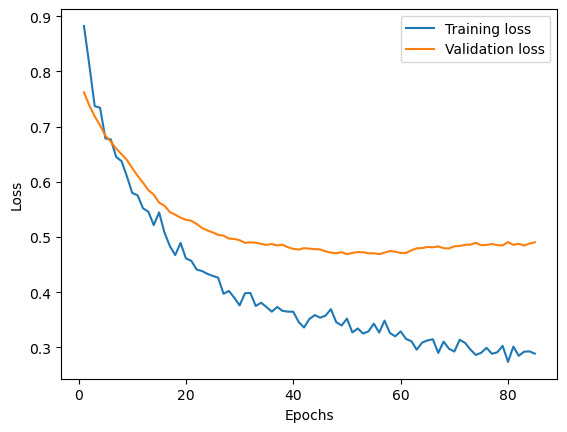

In [67]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


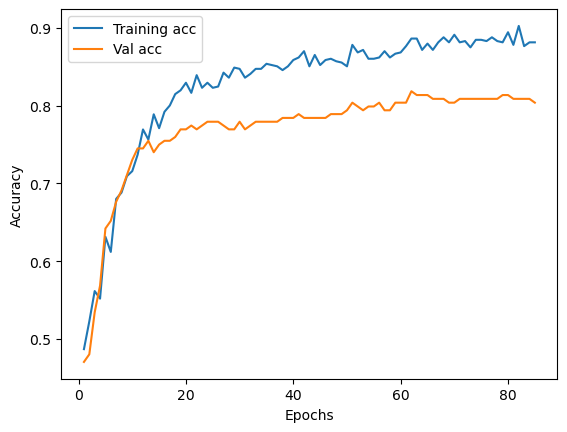

In [68]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()